# Random Forest - Regression
***Also Additional Analysis of Various Regression Methods***

In [4]:
import numpy as np
import pandas as pda
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("rock_density_xray.csv")

In [6]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [8]:
df.columns=['Signal',"Density"]
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='Signal', ylabel='Density'>

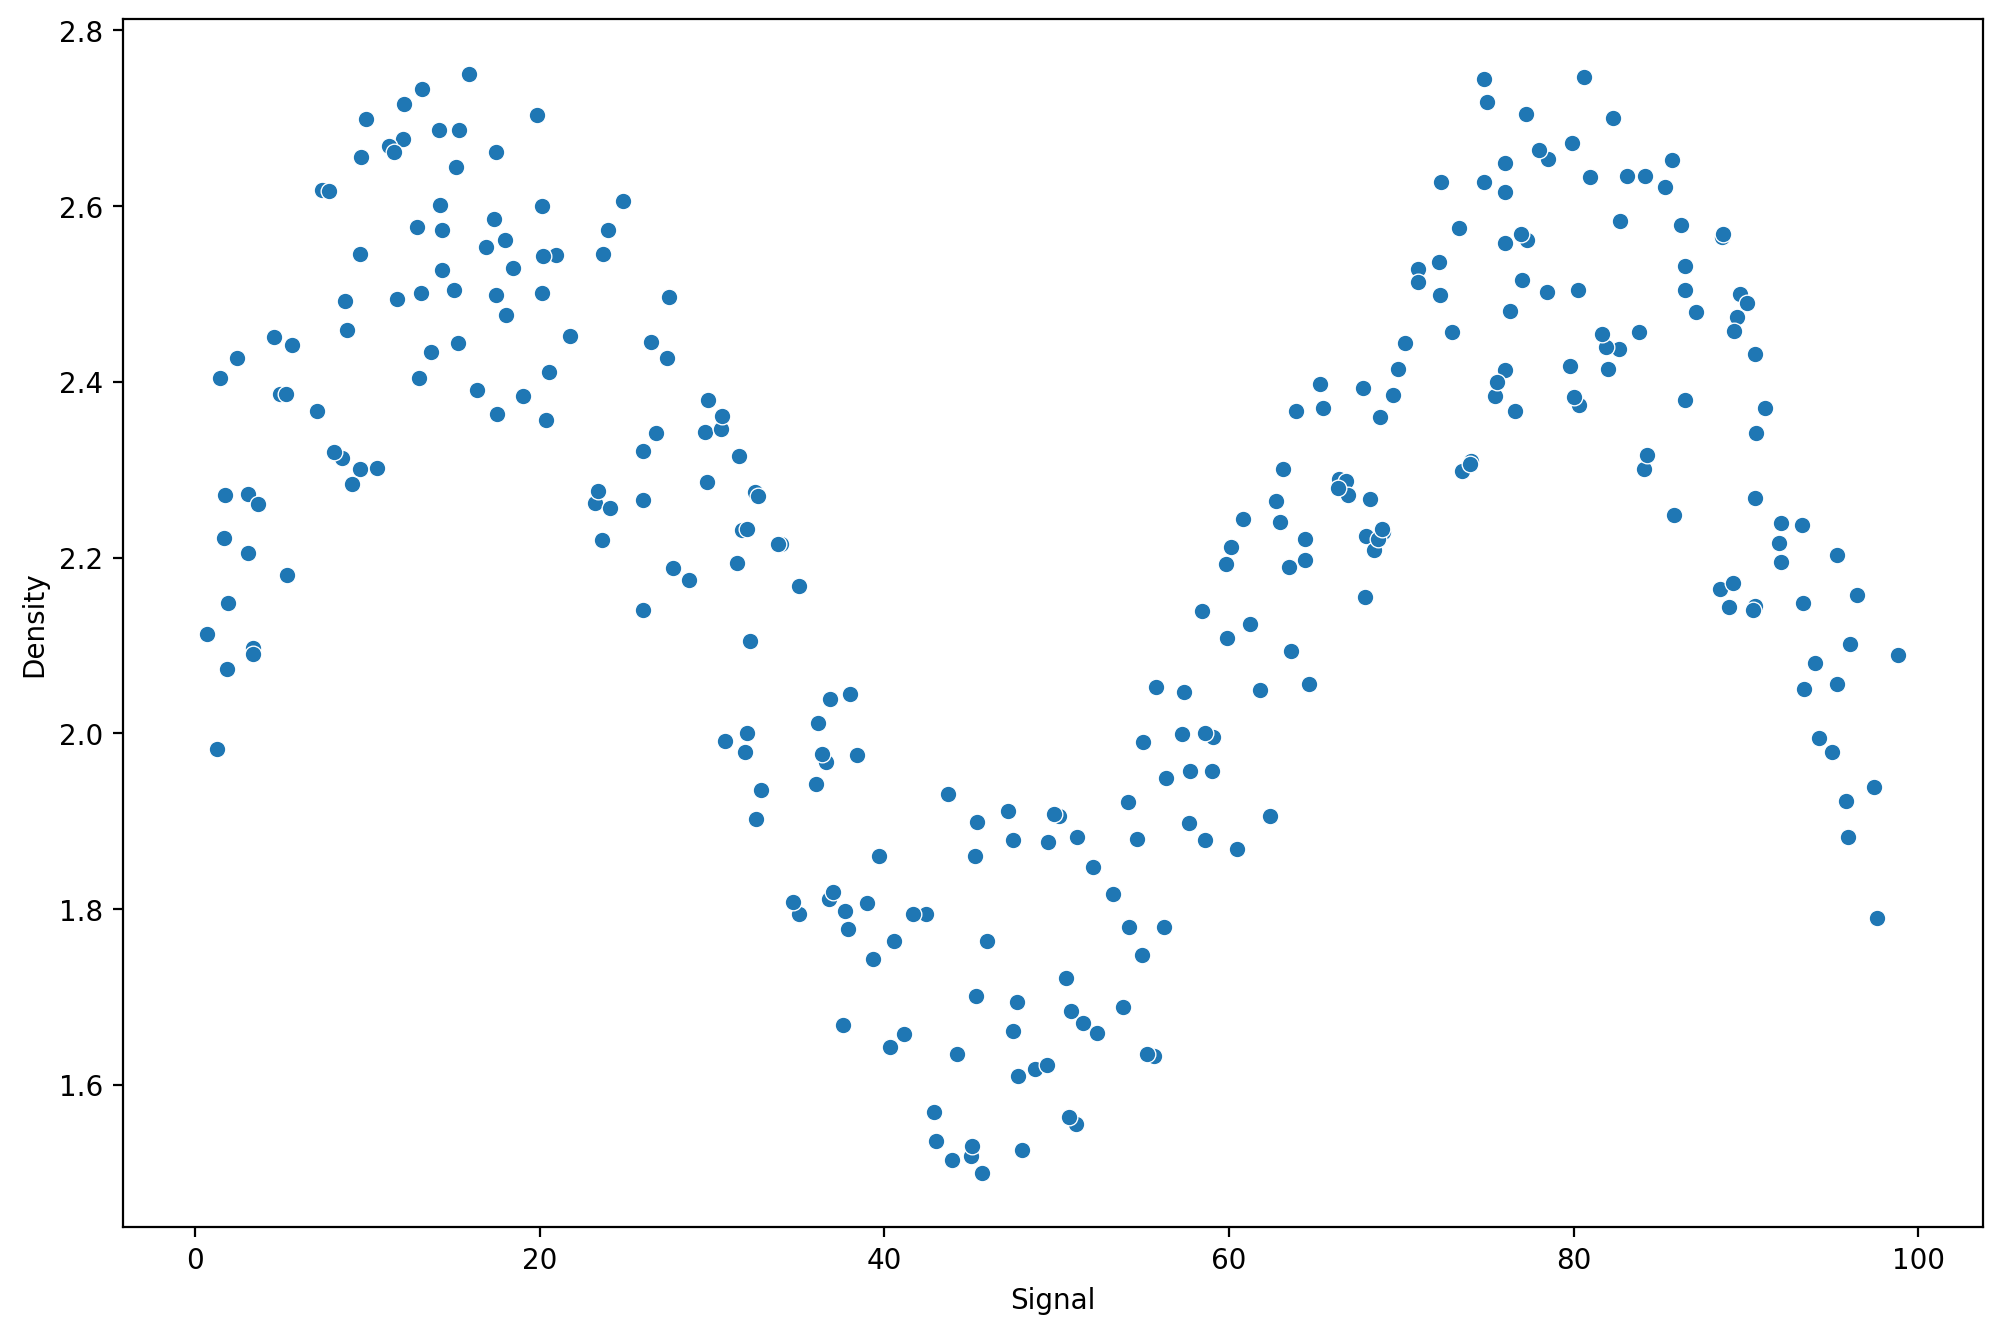

In [9]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [15]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_preds = lr_model.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

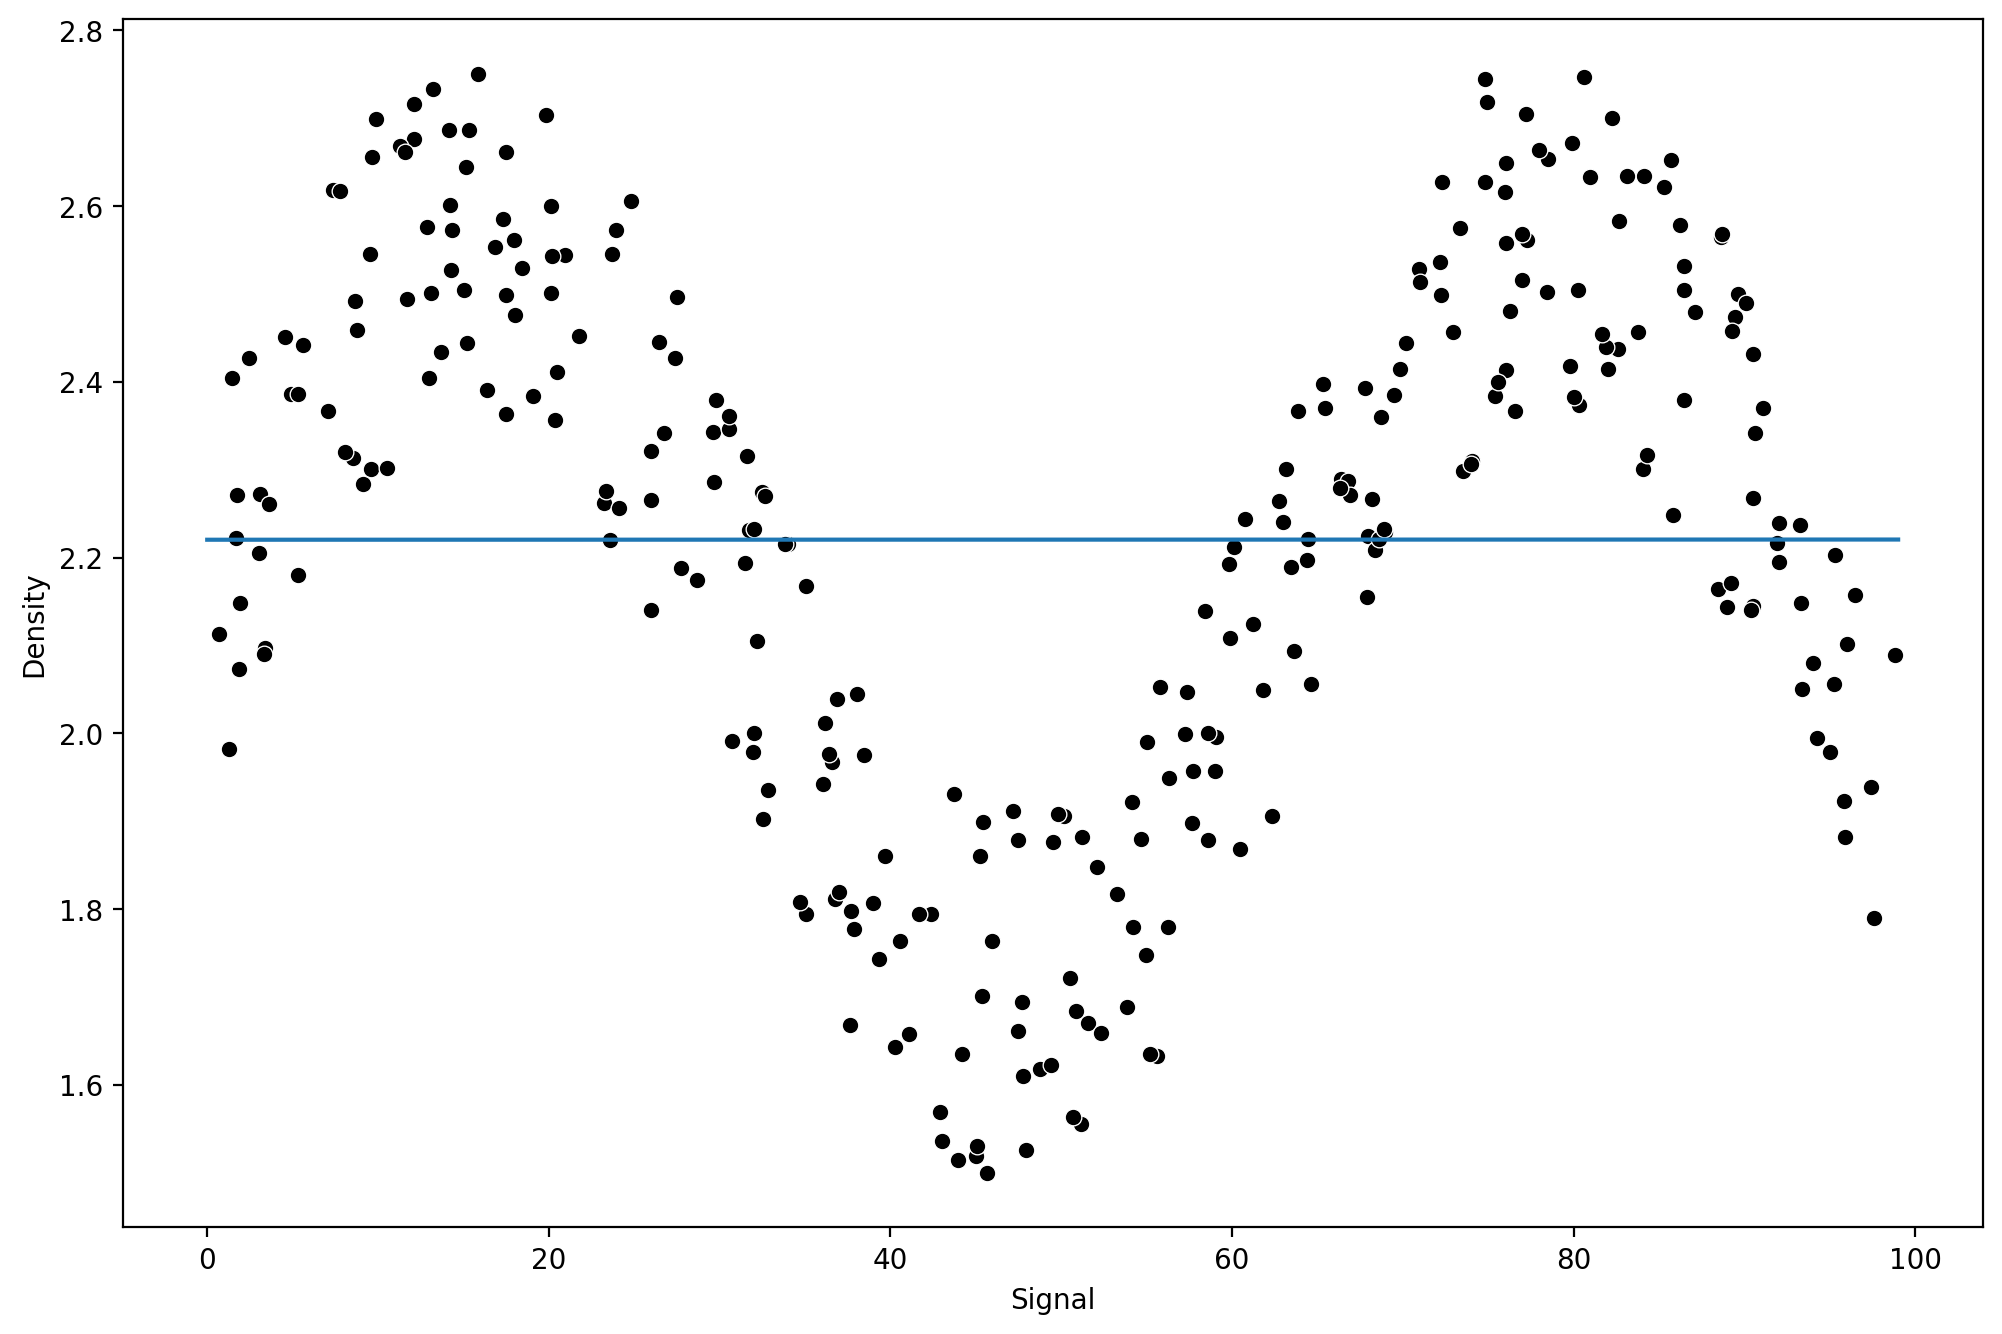

In [15]:
signal_range = np.arange(0,100)
lr_output = lr_model.predict(signal_range.reshape(-1,1))
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

In [19]:
def run_model(model,X_train,y_train,X_test,y_test):   
    # Fit Model
    model.fit(X_train,y_train)
    # Get Metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


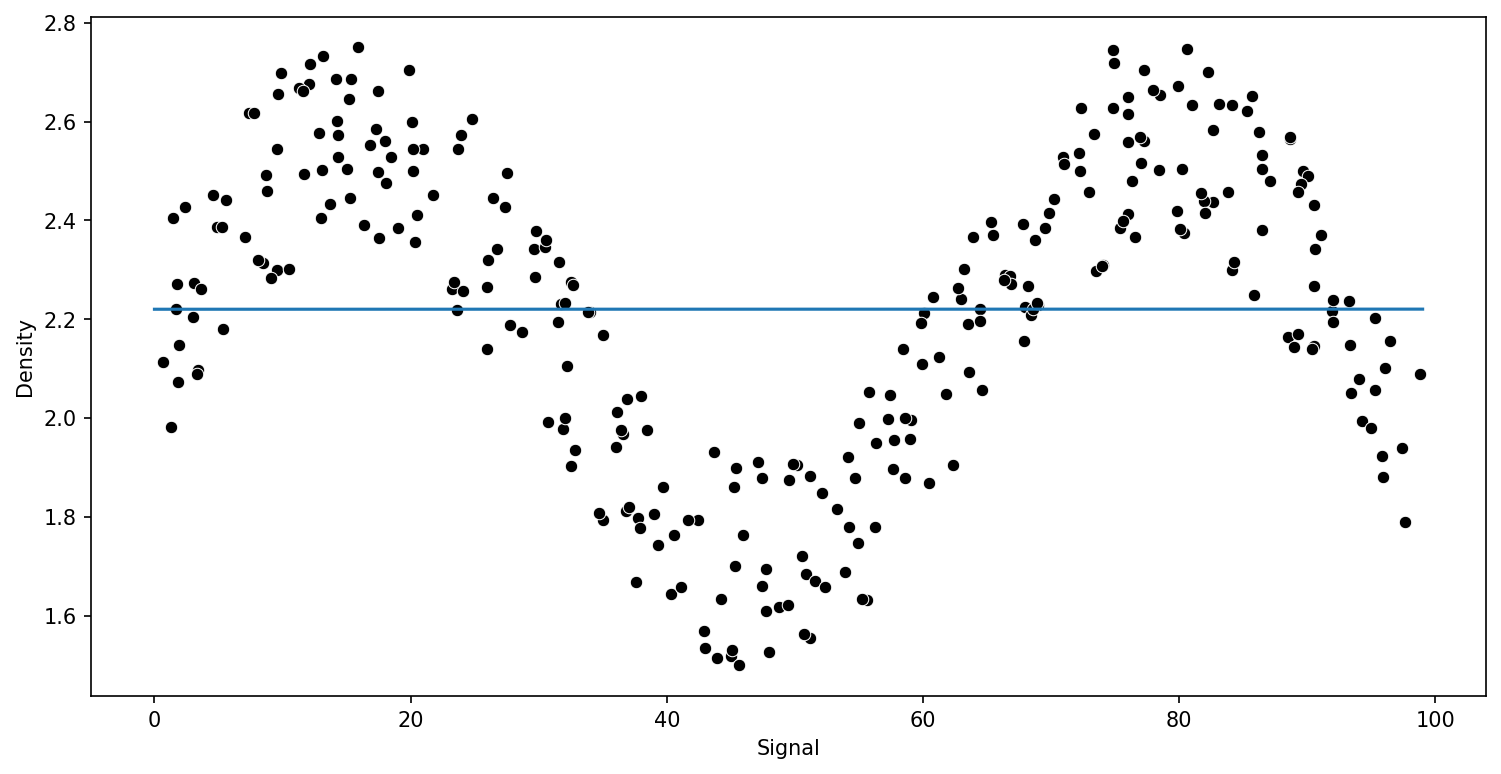

In [18]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.2817309563725558


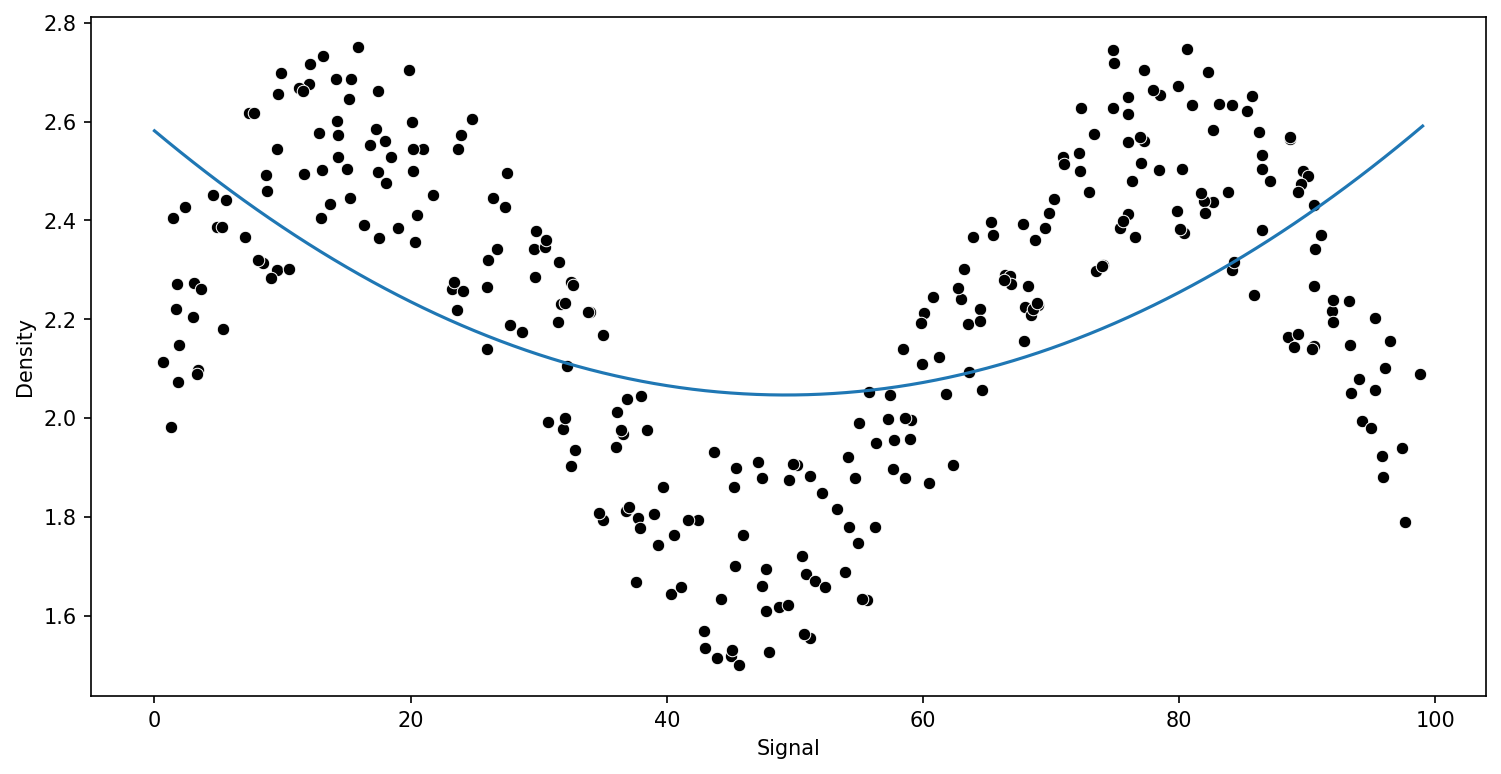

In [20]:
#Pipeline for Poly Orders
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14081666978312882


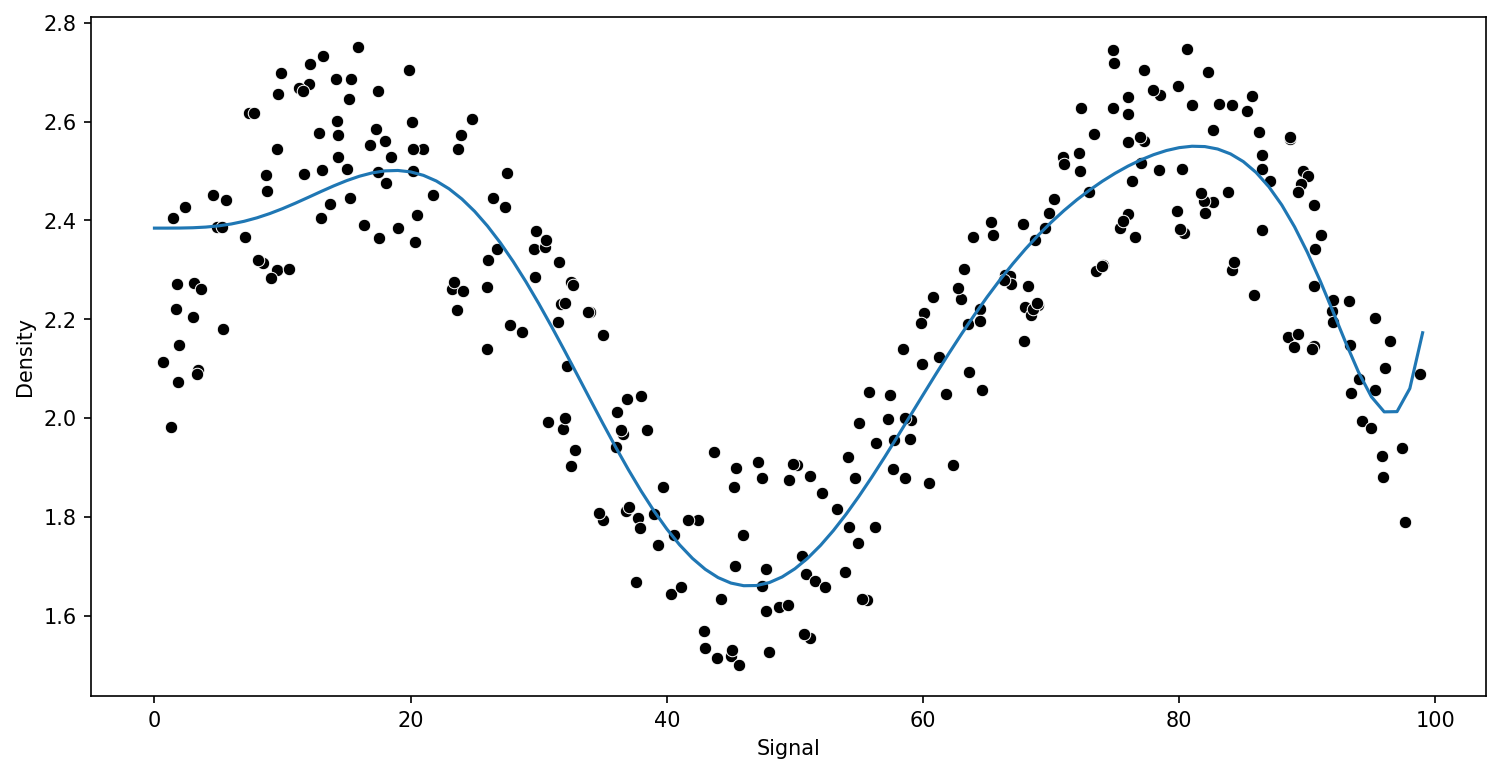

In [21]:
#Comparing Various Polynomial Orders - 10
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


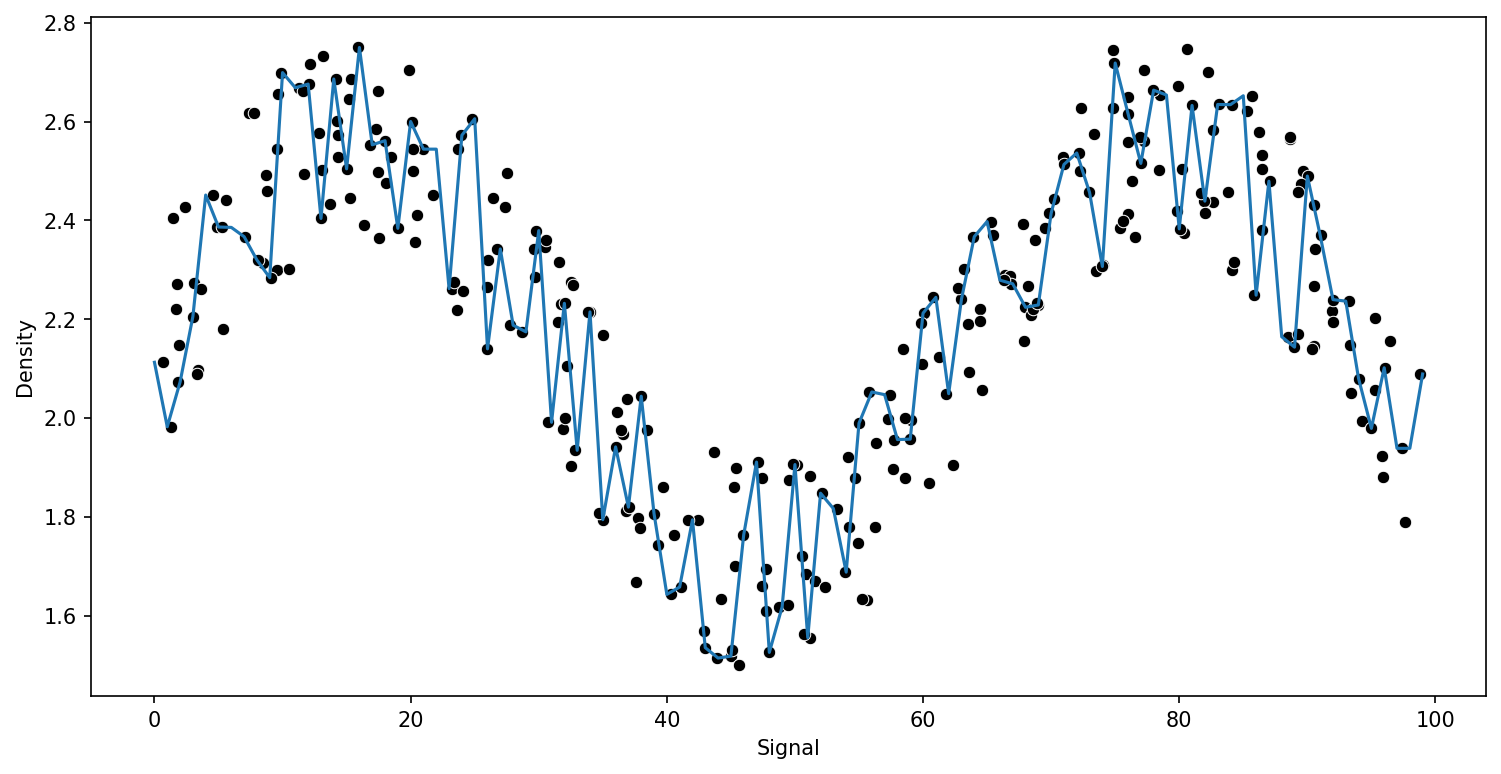

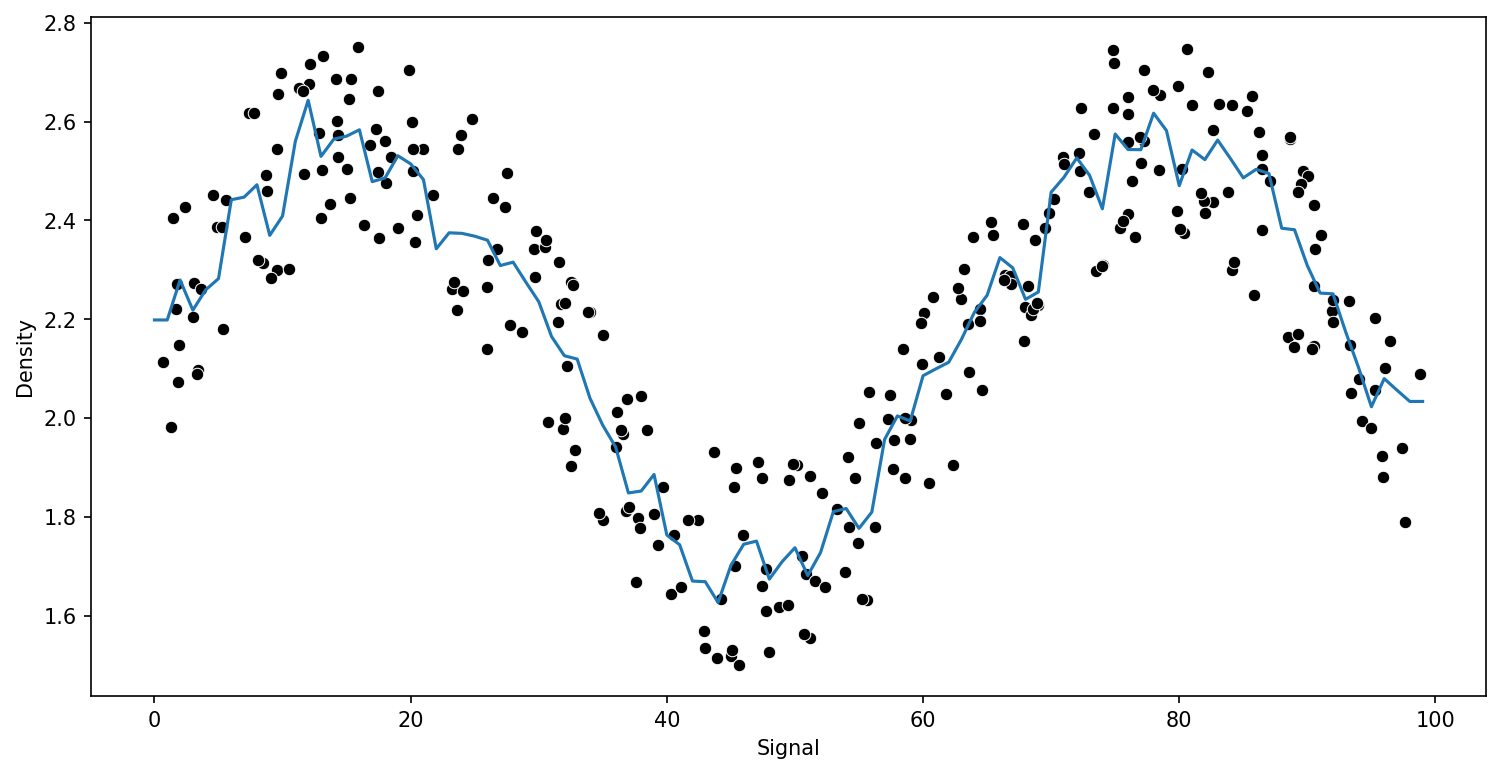

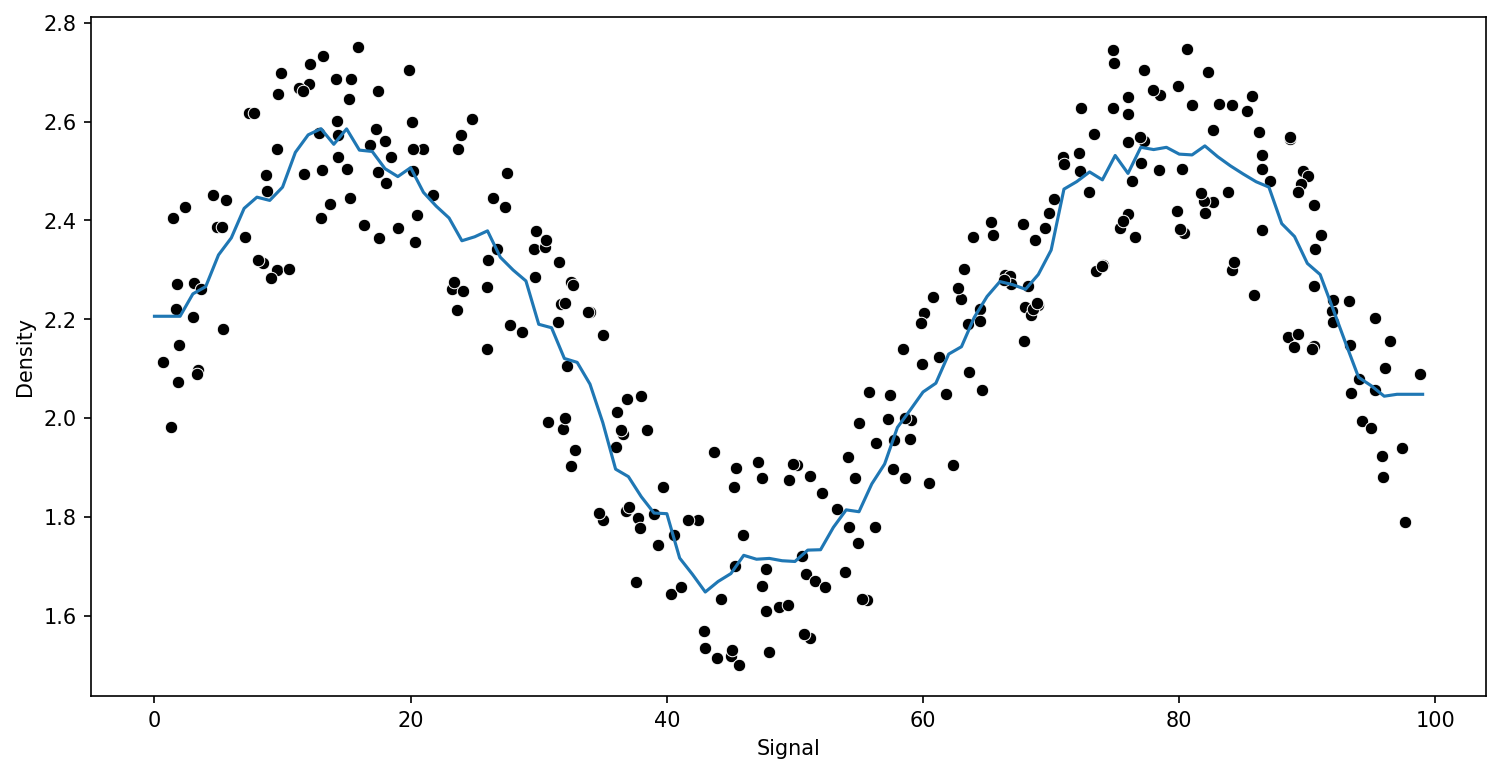

In [22]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
preds = {}
k_values = [1,5,10]
for n in k_values:    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.1523487028635337


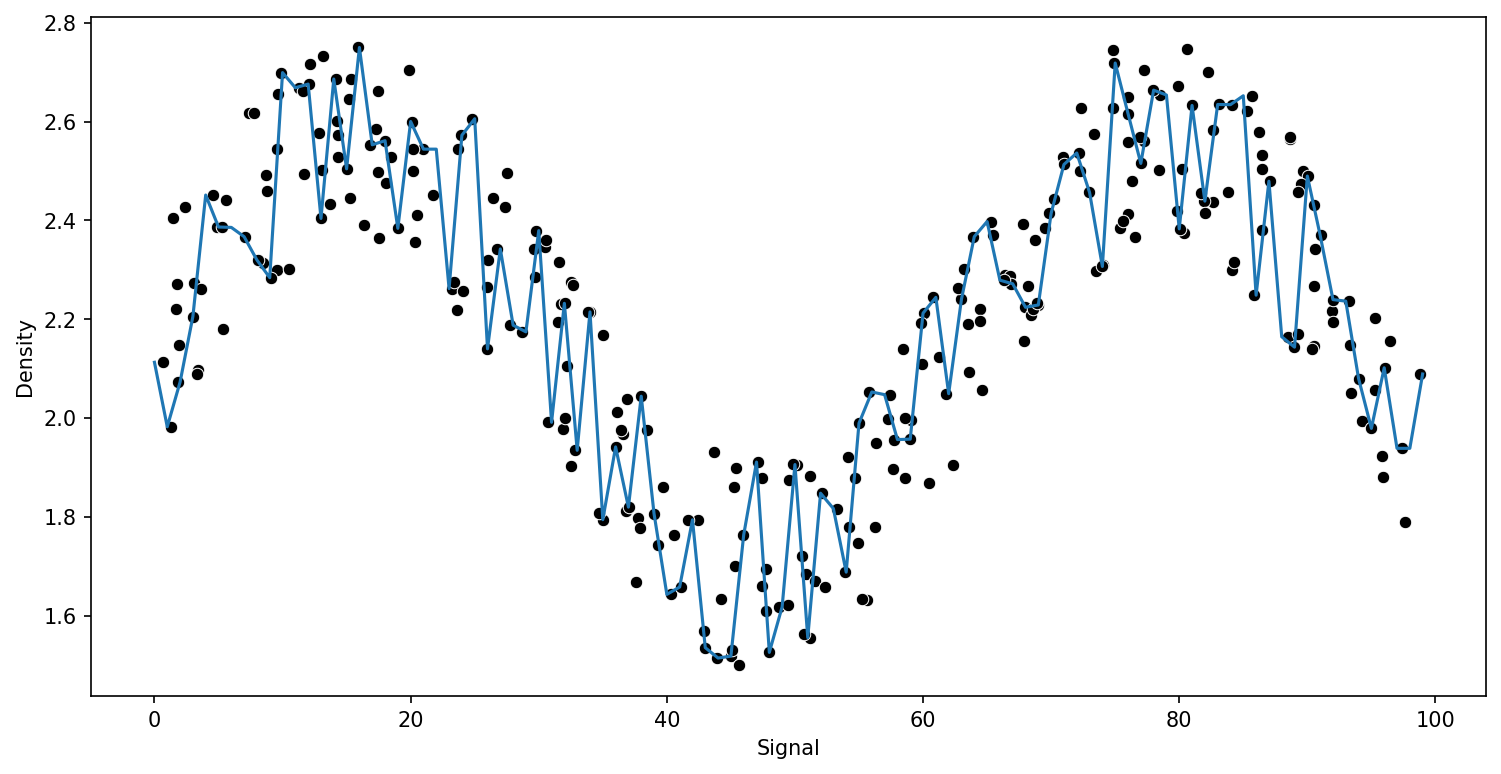

In [23]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [24]:
model.get_n_leaves()

270

RMSE : 0.12646999302046696


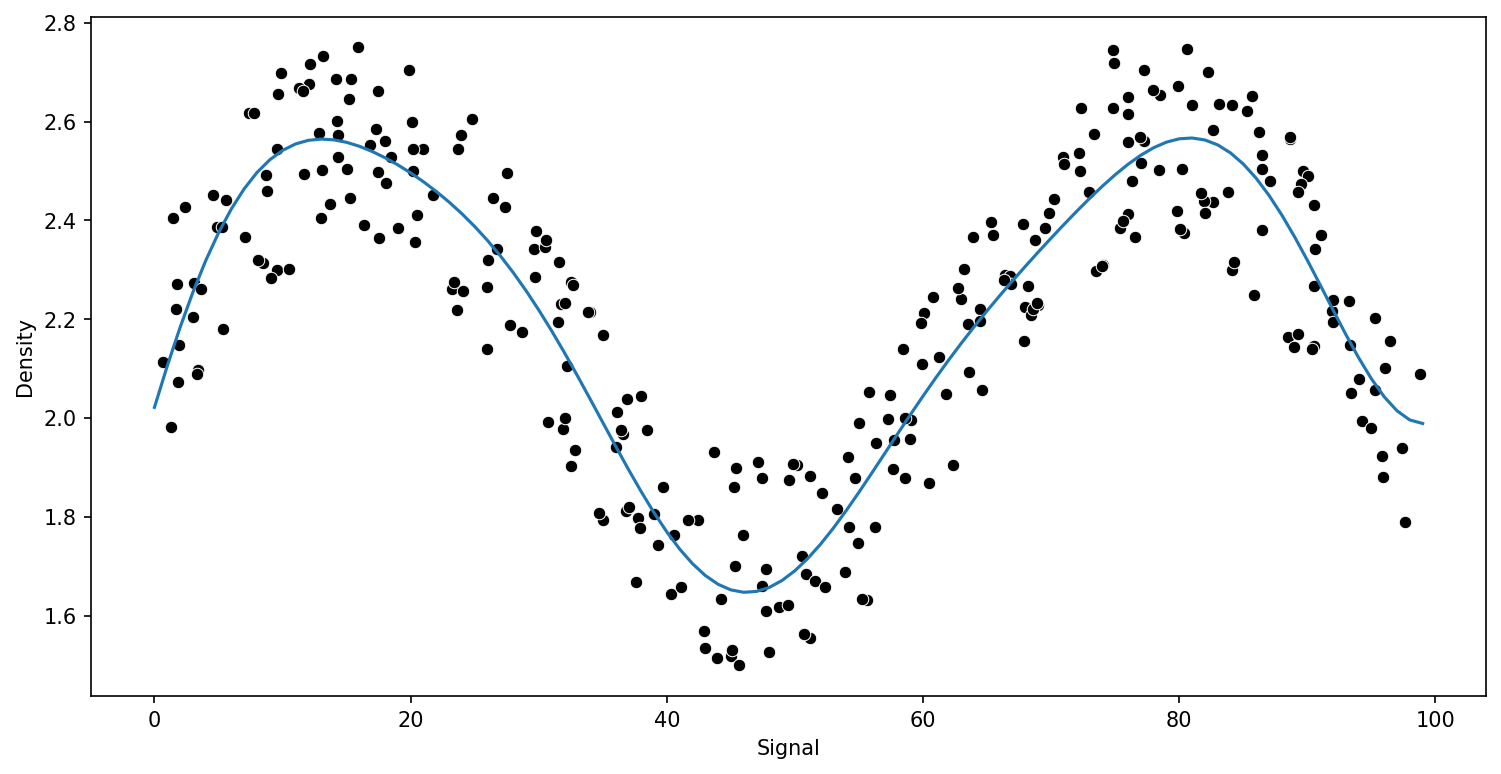

In [25]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

In [26]:
grid.best_estimator_

SVR(C=1000)

RMSE : 0.1299944970620422
RMSE : 0.138964790965783
RMSE : 0.13599417663589056


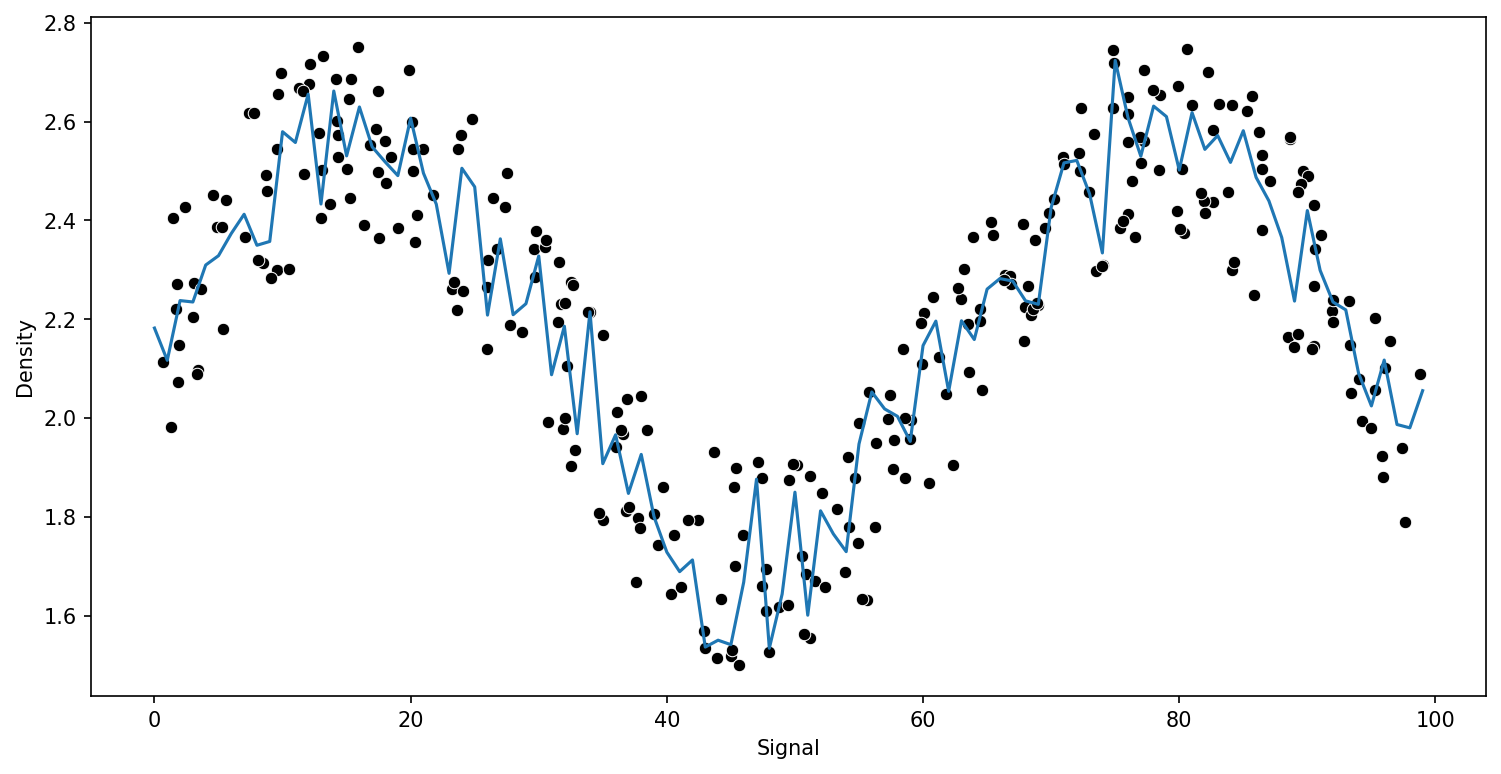

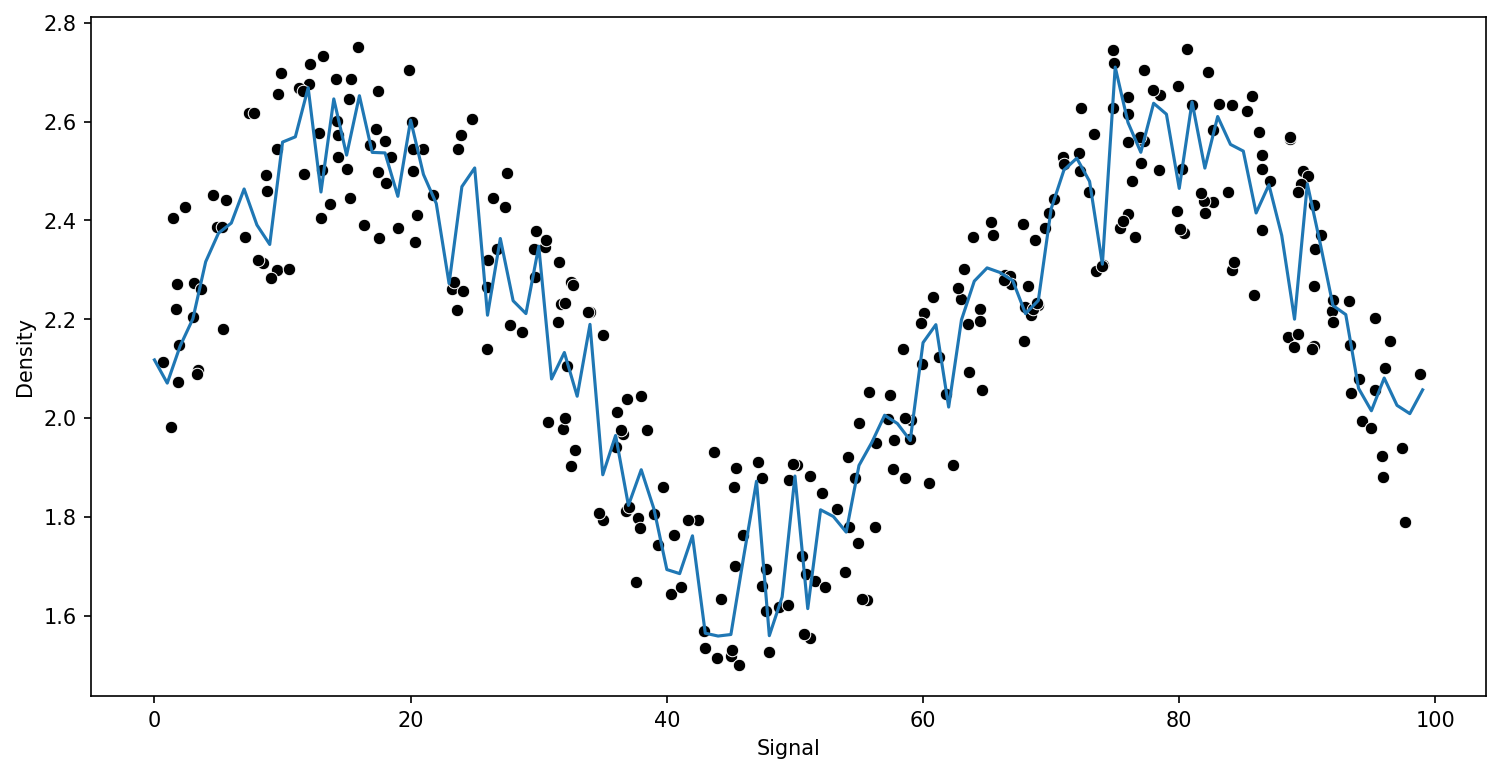

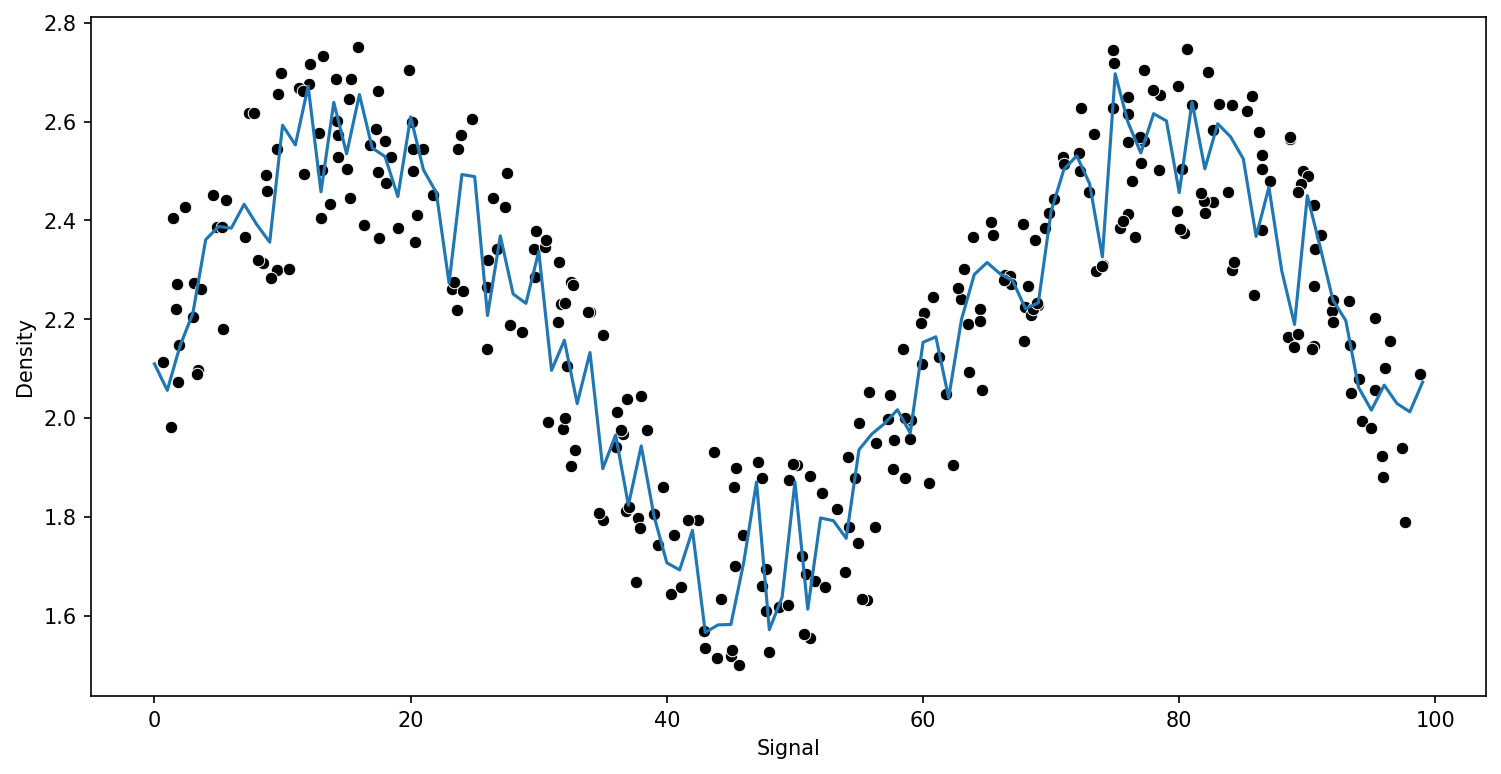

In [27]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
trees = [10,50,100]
for n in trees:
    model = RandomForestRegressor(n_estimators=n)   
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.13294148649584667


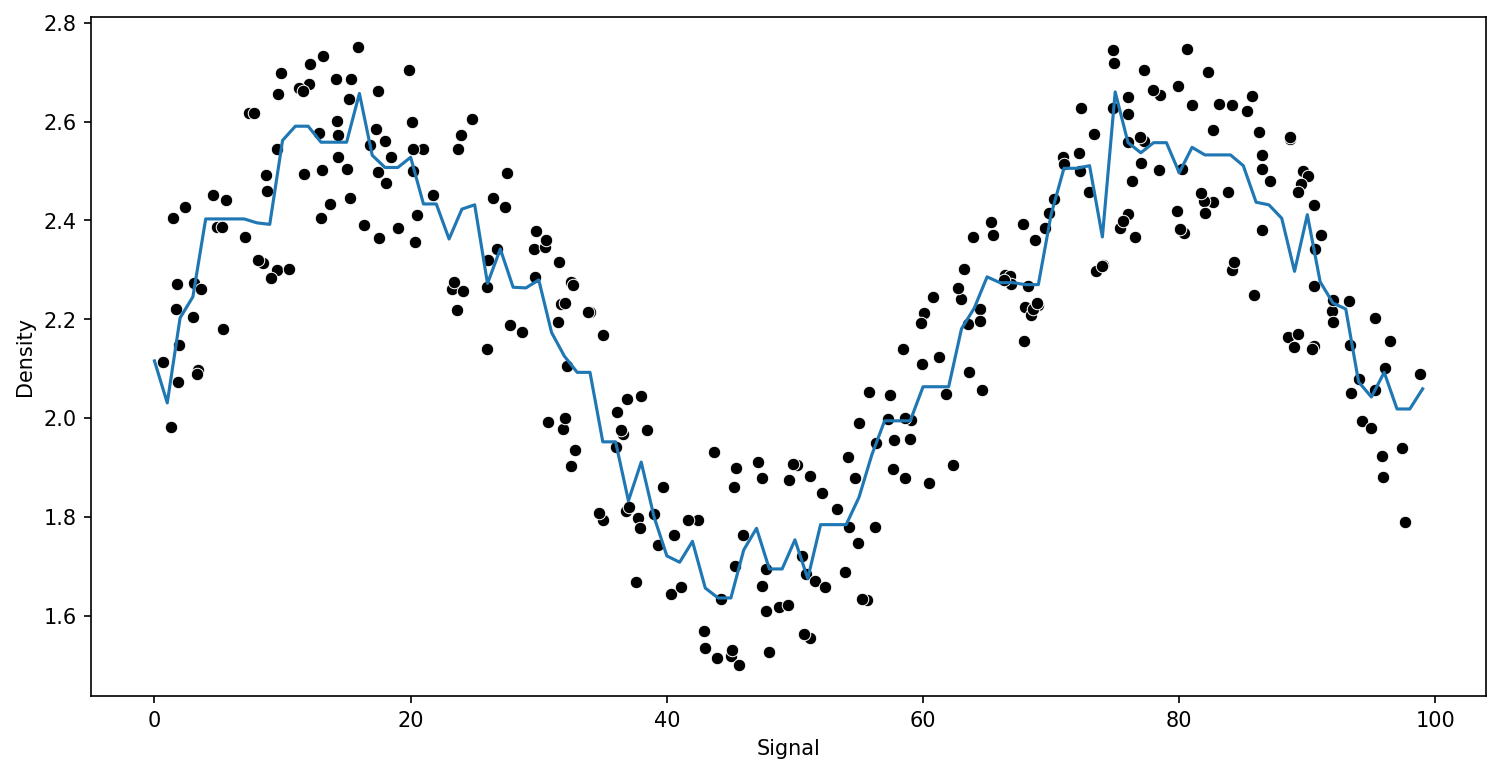

In [28]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.1330753870466069


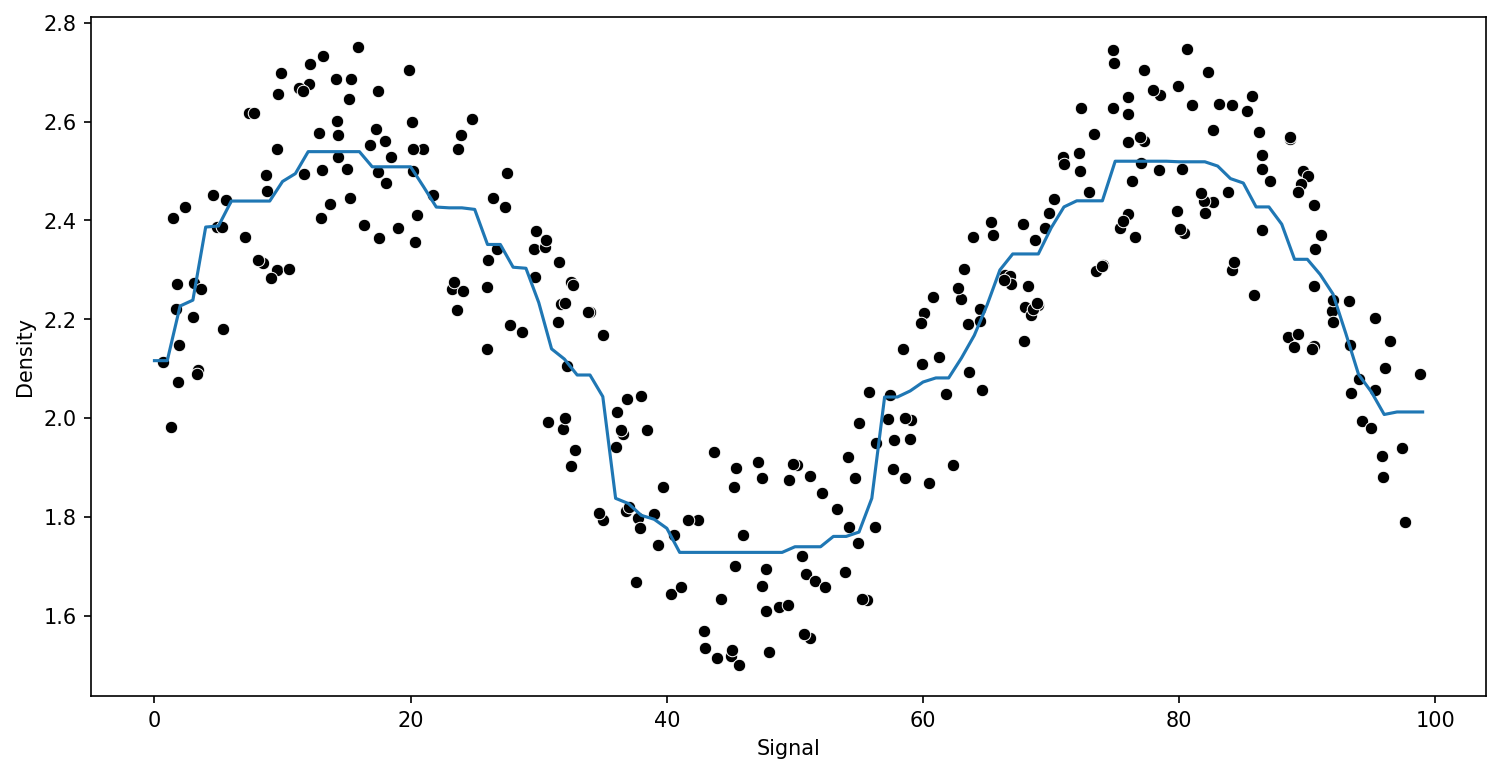

In [29]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)